# # Documentation sur l'analyse des données de Ligue 1 sur plusieurs années

On commence par faire les importations et transformer le csv avec les données en DataFrame

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("resultats_matchs.csv", delimiter=";")

On choisi ensuite l'équipe que nous voulons analyser

In [79]:
list_equipe = df.drop_duplicates(subset='equipe_dom', keep="last")['equipe_dom'].values
for equipe in list_equipe :
    print(equipe)
    i = 0
while i != 1 :
   print("\nEntrer le nom d'une équipe : ")
   equipe_choix = input()
   for equipe in list_equipe :
       if equipe_choix == equipe :
           i+=1
   if i != 1 :
       print("\nl'equipe n'existe pas")
df = df[(df['equipe_dom'] == equipe_choix)|(df['equipe_ext'] == equipe_choix)]

Lens
Evian
GFC Ajaccio
Lorient
Nancy
Bastia
Troyes
Metz
Reims
Angers
Montpellier
Nantes
Lille
Toulouse
Dijon
Caen
Saint-Etienne
Lyon
Amiens
Strasbourg
Bordeaux
Monaco
Marseille
Nice
Rennes
Nîmes
Guingamp
PSG

Entrer le nom d'une équipe : 
PSG


### Evolution des points à travers les saisons

In [82]:
def evolution_saison(df, equipe_choix):
    analyse = pd.DataFrame(columns=['score'], index=df.drop_duplicates(subset='saison', keep='last')['saison'].values)
    analyse.loc[:,'score'] = 0
    for saison,equipe_dom, equipe_ext, resultat in df[['saison','equipe_dom','equipe_ext','resultat']].values.tolist()  :
        if (equipe_dom == equipe_choix) & (resultat == "VD") :
            analyse.loc[saison,'score'] += 3 
        if (equipe_dom == equipe_choix) & (resultat == "N") :
            analyse.loc[saison,'score'] += 1
        if (equipe_ext == equipe_choix) & (resultat == "N") :
            analyse.loc[saison,'score'] += 1
        if (equipe_ext == equipe_choix) & (resultat == "VE") :
            analyse.loc[saison,'score'] += 3 

    plt.figure()
    plt.title("Evoltion de "+equipe_choix+" par saison")
    plt.plot(analyse.index, analyse['score'], label="évolution du score")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlabel("Saison")
    plt.ylabel("Score")
    plt.show()

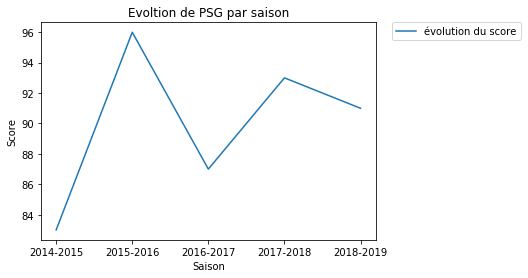

In [83]:
evolution_saison(df,equipe_choix)

### Evolution du nombre de but encaissé/marqué

In [84]:
def evolution_nombre_but(df, equipe_choix):
    analyse = pd.DataFrame(columns=['but_enc','but_mark'], index=df.drop_duplicates(subset='saison', keep='last')['saison'].values)
    analyse.loc[:,'but_enc'] = 0
    analyse.loc[:,'but_mark'] = 0
    for saison,equipe_dom, equipe_ext, score_ext,score_dom in df[['saison','equipe_dom','equipe_ext','score_ext','score_dom']].values.tolist() : 
        if (equipe_dom == equipe_choix) :
            analyse.loc[saison,'but_enc']  += score_ext
            analyse.loc[saison,'but_mark'] += score_dom
        if (equipe_ext == equipe_choix) :
            analyse.loc[saison,'but_enc']  += score_dom
            analyse.loc[saison,'but_mark'] += score_ext
    plt.figure()
    plt.title("Evolution des buts de "+equipe_choix)
    plt.plot(analyse.index, analyse['but_enc'], label="évolution des buts encaissés")
    plt.plot(analyse.index, analyse['but_mark'], label="évolution des buts marqués")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlabel("Saison")
    plt.ylabel("Nombre de buts encaissés/marqués")
    plt.show()

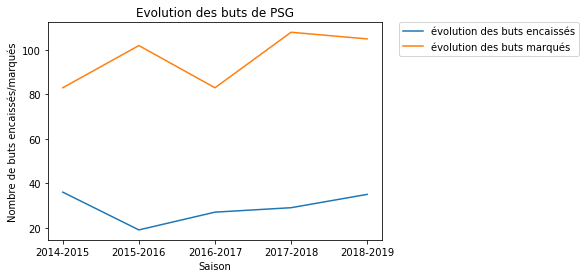

In [85]:
evolution_nombre_but(df, equipe_choix)

### Evolution des victoires/defaites/nulles

In [86]:
def evolution_match_VD(df, equipe_choix):
    analyse = pd.DataFrame(columns=['victoire','defaite','egalite'], index=df.drop_duplicates(subset='saison', keep='last')['saison'].values)
    analyse.loc[:,'victoire'] = 0
    analyse.loc[:,'defaite'] = 0
    analyse.loc[:,'egalite'] = 0
    for saison,equipe_dom, equipe_ext,resultat in df[['saison','equipe_dom','equipe_ext','resultat']].values.tolist() : 
        if (equipe_dom == equipe_choix):
            if (resultat == "VD"):
                analyse.loc[saison,'victoire']  += 1
            else:
                analyse.loc[saison,'defaite']  += 1
        if (equipe_ext == equipe_choix):
            if (resultat == "VE"):
                analyse.loc[saison,'victoire']  += 1
            else:
                analyse.loc[saison,'defaite']  += 1
        if (resultat == "N") :
            analyse.loc[saison,'egalite']  += 1
            
    plt.figure()
    plt.title("Evoltion des matchs de "+equipe_choix)
    plt.plot(analyse.index, analyse['victoire'], label="évolution des victoires")
    plt.plot(analyse.index, analyse['defaite'], label="évolution des defaites")
    plt.plot(analyse.index, analyse['egalite'], label="évolution des égalités")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlabel("Saison")
    plt.ylabel("Nombre de V/D")
    plt.show()

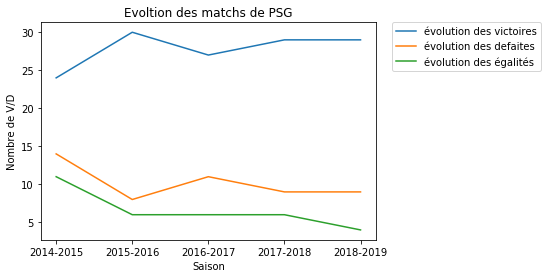

In [87]:
evolution_match_VD(df,equipe_choix)